<a href="https://colab.research.google.com/github/aryavast12/Arya-Portfolio/blob/main/EDA_assignment_Arya_Vast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Dataset Selection

In [1]:
# Load the dataset (pd.read_csv() or similar).
import seaborn as sns
import pandas as pd

datasets = sns.get_dataset_names()
print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
# Display the first few rows and dataset info.
df = sns.load_dataset("tips")
print(df.head())
print(df.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


Step 2: Data Loading and Cleaning

In [3]:
# Check for missing values and handle them (drop, fill, etc.).
missing_values = df.isnull().sum()
print(missing_values)

df = df.dropna()
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [4]:
# Columns remaned and converted to appropriate data types

df = df.rename(columns={"total_bill": "TotalBill", "tip": "Tip", "sex": "Gender", "smoker": "SmokerStatus", "day": "Day", "time": "MealTime", "size": "GroupSize"})

df["TotalBill"] = df["TotalBill"].astype(float)
df["Tip"] = df["Tip"].astype(float)
df["GroupSize"] = df["GroupSize"].astype(int)

print(df.dtypes)
print(df.head())

TotalBill        float64
Tip              float64
Gender          category
SmokerStatus    category
Day             category
MealTime        category
GroupSize          int64
dtype: object
   TotalBill   Tip  Gender SmokerStatus  Day MealTime  GroupSize
0      16.99  1.01  Female           No  Sun   Dinner          2
1      10.34  1.66    Male           No  Sun   Dinner          3
2      21.01  3.50    Male           No  Sun   Dinner          3
3      23.68  3.31    Male           No  Sun   Dinner          2
4      24.59  3.61  Female           No  Sun   Dinner          4


Step 3: Descriptive Statistics and Exploration
Use NumPy and Pandas to:

In [11]:
# Generate summary statistics (.describe(), .info(), .value_counts()).
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(df[col].value_counts())



sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [12]:
# Identify numerical vs categorical columns.
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['total_bill', 'tip', 'size']
Categorical Columns: ['sex', 'smoker', 'day', 'time']


In [13]:
# Compute mean, median, mode, standard deviation, etc.
mean_values = df[numerical_cols].mean()
median_values = df[numerical_cols].median()
mode_values = df[numerical_cols].mode().iloc[0]
std_values = df[numerical_cols].std()

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)
print("Standard Deviation:\n", std_values)


Mean Values:
 total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64
Median Values:
 total_bill    17.795
tip            2.900
size           2.000
dtype: float64
Mode Values:
 total_bill    13.42
tip            2.00
size           2.00
Name: 0, dtype: float64
Standard Deviation:
 total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64


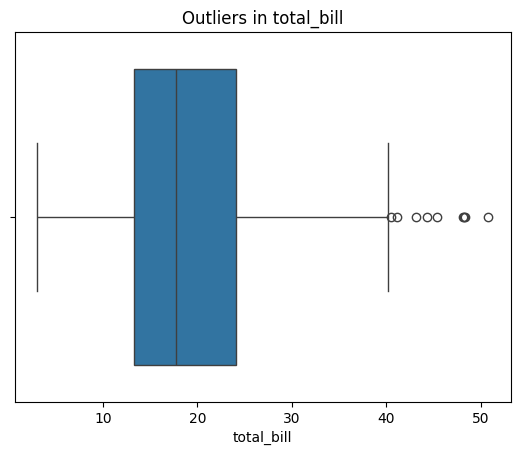

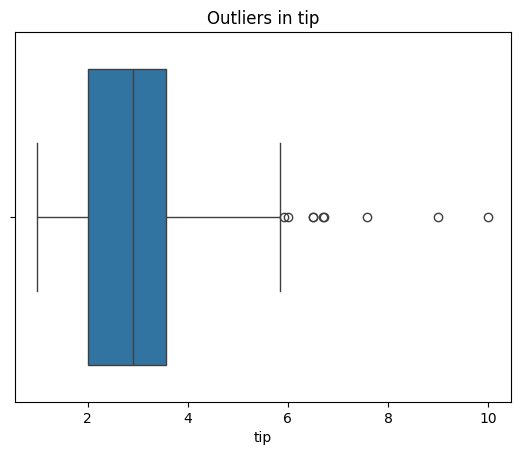

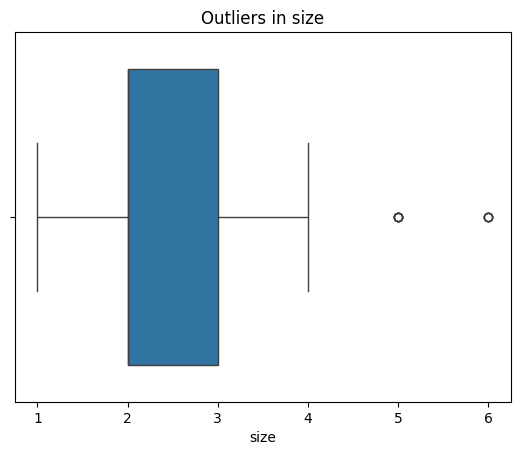

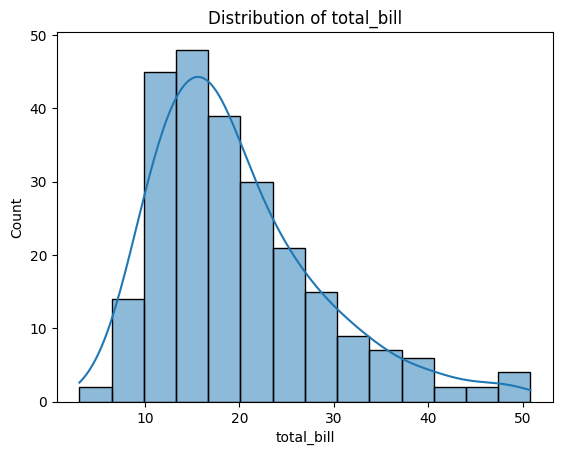

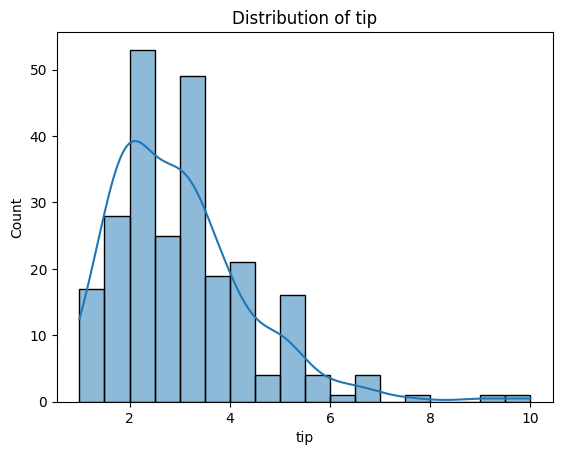

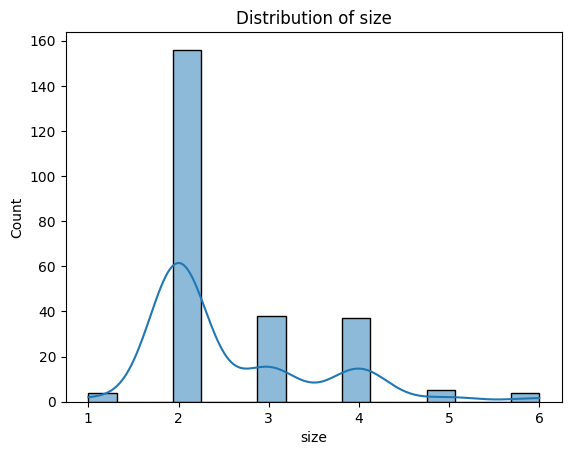

In [14]:
# Check for outliers and data distribution.
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Step 4: Data Visualization
Use Matplotlib and Seaborn to visualize:

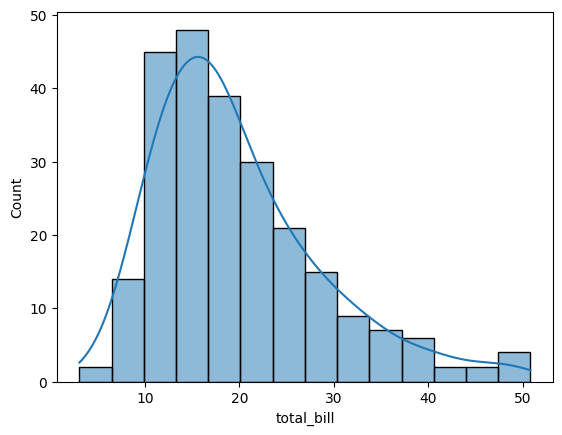

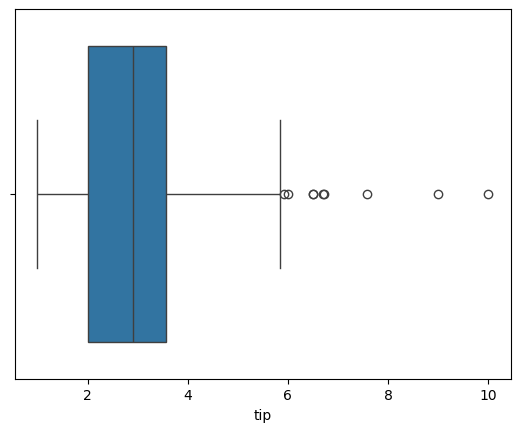

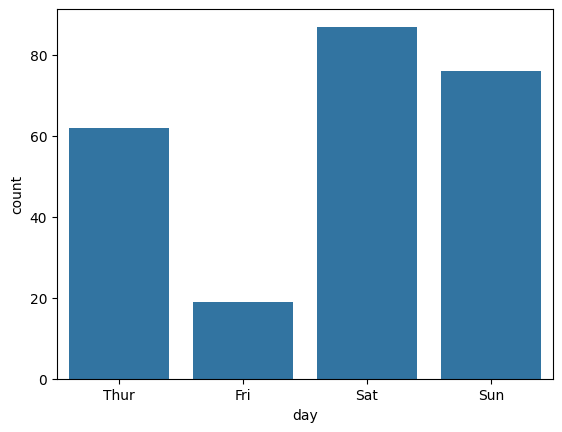

In [16]:
# Univariate Analysis – Histograms, Boxplots, Countplots.


df = sns.load_dataset("tips")

sns.histplot(df["total_bill"], kde=True)
plt.show()

sns.boxplot(x=df["tip"])
plt.show()

sns.countplot(x=df["day"])
plt.show()

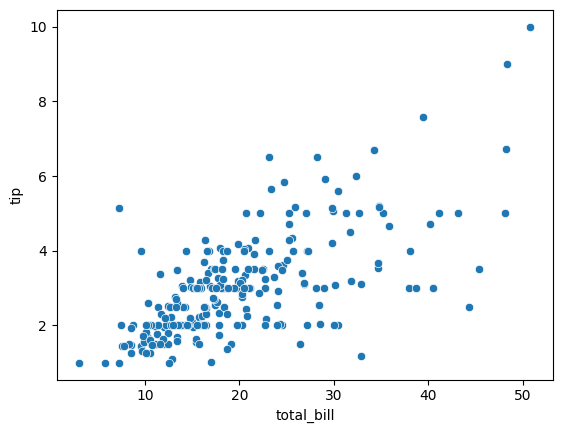

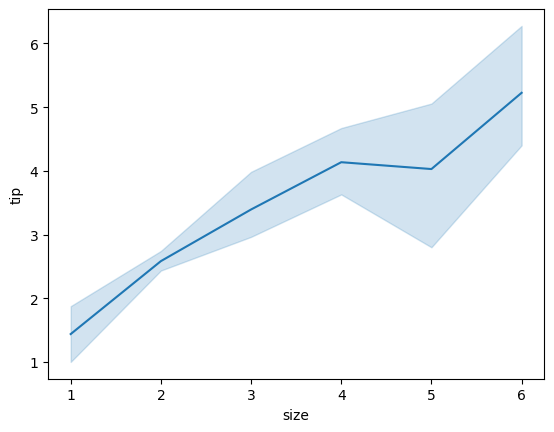

In [17]:
# Bivariate Analysis – Scatterplots, lineplot.

sns.scatterplot(x="total_bill", y="tip", data=df)
plt.show()

sns.lineplot(x="size", y="tip", data=df)
plt.show()


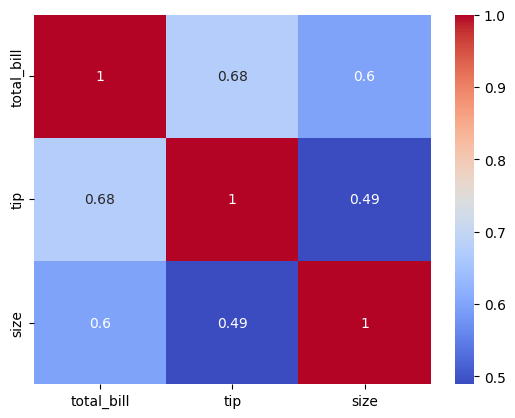

In [18]:
# Correlation Analysis – Correlation matrix using sns.heatmap().
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


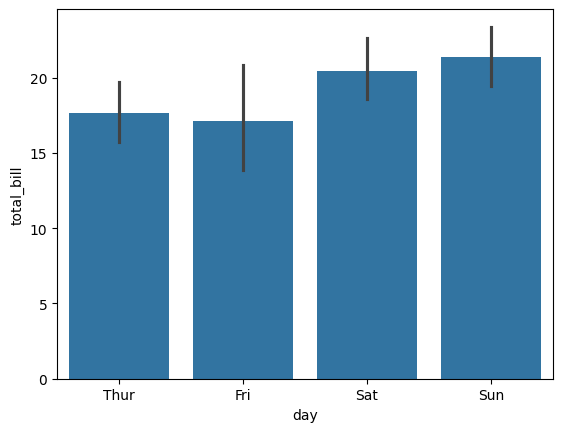

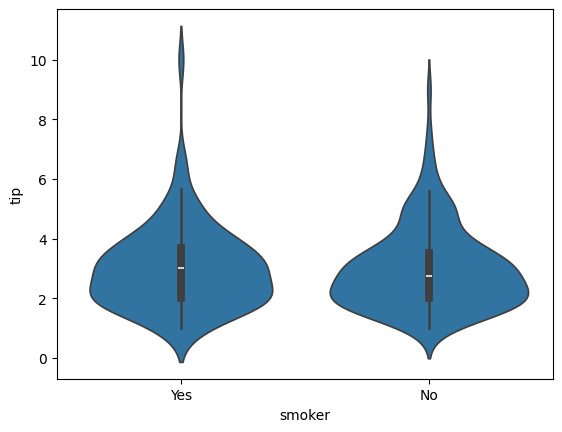

In [19]:
# Categorical Analysis – Bar plots or violin plots.
sns.barplot(x="day", y="total_bill", data=df)
plt.show()

sns.violinplot(x="smoker", y="tip", data=df)
plt.show()


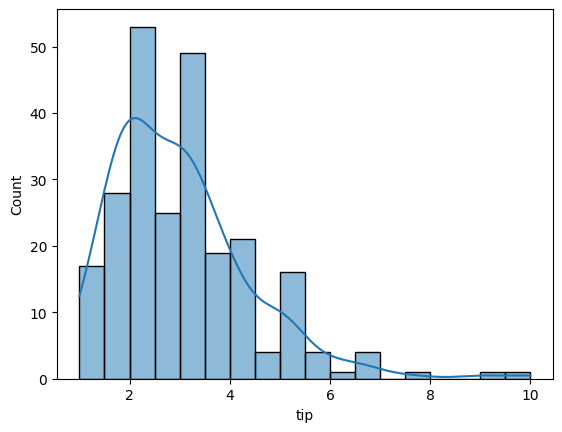

In [20]:
# Distribution Plots – sns.distplot() or sns.histplot().
sns.histplot(df["tip"], kde=True)
plt.show()


Step 5: Insights and Conclusion